In [17]:
import os

csv_files = []

for root, dirs, files in os.walk('cleaned_data'):
    for filename in files:
        if filename.find('csv') < 0:
            continue
        else:
            csv_files.append(os.path.join(root, filename))

In [23]:
import csv
contents = {}
for filename in csv_files:
    year = int(filename.split('/')[-1].split('.')[0])
    
    with open(filename) as handle:
        csv_reader = csv.reader(handle, delimiter=',', quotechar='"')
        for i, row in enumerate(csv_reader):
            if i == 0:
                continue
            else:
                if year in contents:
                    contents[year].append(row)
                else:
                    contents[year] = [row]
                    

In [51]:
song_title_words_freqs = {}
import string
exclude = set(string.punctuation)

for year, songs in contents.iteritems():
    for song in songs:
        if len(song) < 3:
            continue
        rank, artist, title = song
        title_cleaned = ''.join(ch for ch in title if ch not in exclude)
        title_toks = title_cleaned.split(' ')
        title_lower_toks = [x.lower() for x in title_toks]
        
        for tok in title_lower_toks:
            if tok in song_title_words_freqs:
                song_title_words_freqs[tok] += 1
            else:
                song_title_words_freqs[tok] = 1



In [52]:
import operator
sorted_toks = sorted(song_title_words_freqs.items(), key=operator.itemgetter(1))

In [53]:
#rank-freq plots
rank_freq = {}
for term, freq in sorted_toks:
    if freq in rank_freq:
        rank_freq[freq] += 1
    else:
        rank_freq[freq] = 1
    
sorted_rank_freq = sorted(rank_freq.items(), key=operator.itemgetter(1))

import math
xs = [math.log(x[0],10) for x in sorted_rank_freq]
ys = [math.log(x[1],10) for x in sorted_rank_freq]

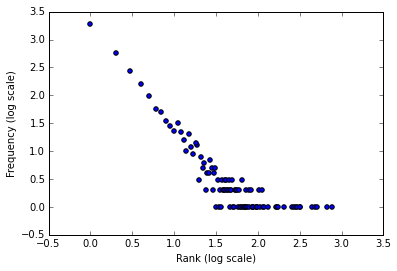

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xs, ys)
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.savefig('power_law.png')